In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')

In [21]:
data = pd.read_csv('data/raw/data.csv')

In [22]:
data.columns

Index(['Edad', 'Sexo', 'Trastorno de consciencia', 'Apache', 'Leucocitos',
       'Glucemia', 'Glucemia en  mg/dl', 'Ilg', 'Estado al egreso',
       'Cardiopatía isquémica', 'Artritis gotosa', 'Dm',
       'Ave isquémico sin secuelas', 'Cefalea migrañosa',
       'Erc sin hemodialisis', 'Epoc', 'Cataratas', 'Hepatitis c',
       'Operado de adenocarcinoma de próstata', 'Erc', 'Hta', 'Artritis',
       'Insuficiencia venosa profunda', 'Insuficiencia cardíaca',
       'Apnea del sueño', 'Ch', 'Hipotiroidismo', 'Fa', 'Salud anterior',
       'Glaucoma', 'Esquizofrenia', 'Insuficiencia venosa periférica',
       'Tumor de ovarios', 'Bnb nosocomial',
       'Insuficiencia respiratoria aguda', 'Sepsis intravascular',
       'Hiperglucemia', 'Bronconeumonía aspirativa',
       'Bronconeumonía asociada a la ventilación', 'Neumonía nosocomial',
       'Bronconeumonia aspirativa', 'Hipernatremia', 'Htec', 'Shock séptico',
       'Pcr recuperado', 'Convulsiones', 'Shock neurogénico',
       'Bnb

Text(0, 0.5, 'Frequency')

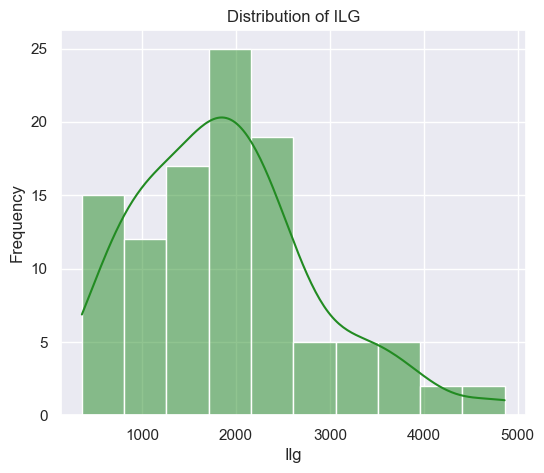

In [23]:
plt.figure(figsize=(6,5))
sns.set(style='darkgrid')
sns.histplot(data['Ilg'], color='forestgreen', kde=True)
plt.title('Distribution of ILG')
plt.ylabel('Frequency')

In [24]:
diseases = data.select_dtypes(include=bool).columns
diseases

Index(['Cardiopatía isquémica', 'Artritis gotosa', 'Dm',
       'Ave isquémico sin secuelas', 'Cefalea migrañosa',
       'Erc sin hemodialisis', 'Epoc', 'Cataratas', 'Hepatitis c',
       'Operado de adenocarcinoma de próstata', 'Erc', 'Hta', 'Artritis',
       'Insuficiencia venosa profunda', 'Insuficiencia cardíaca',
       'Apnea del sueño', 'Ch', 'Hipotiroidismo', 'Fa', 'Salud anterior',
       'Glaucoma', 'Esquizofrenia', 'Insuficiencia venosa periférica',
       'Tumor de ovarios', 'Bnb nosocomial',
       'Insuficiencia respiratoria aguda', 'Sepsis intravascular',
       'Hiperglucemia', 'Bronconeumonía aspirativa',
       'Bronconeumonía asociada a la ventilación', 'Neumonía nosocomial',
       'Bronconeumonia aspirativa', 'Hipernatremia', 'Htec', 'Shock séptico',
       'Pcr recuperado', 'Convulsiones', 'Shock neurogénico',
       'Bnb aspirativa'],
      dtype='object')

In [25]:
disease_counts = data[diseases].sum()

disease_df = pd.DataFrame({
    'Parameter': disease_counts.index,
    'Frequency': disease_counts.values
})

/var/folders/z2/x55d_0sd3zl143hy_l05bnpr0000gn/T/ipykernel_10145/1048816946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Parameter', data=disease_df, palette='viridis')


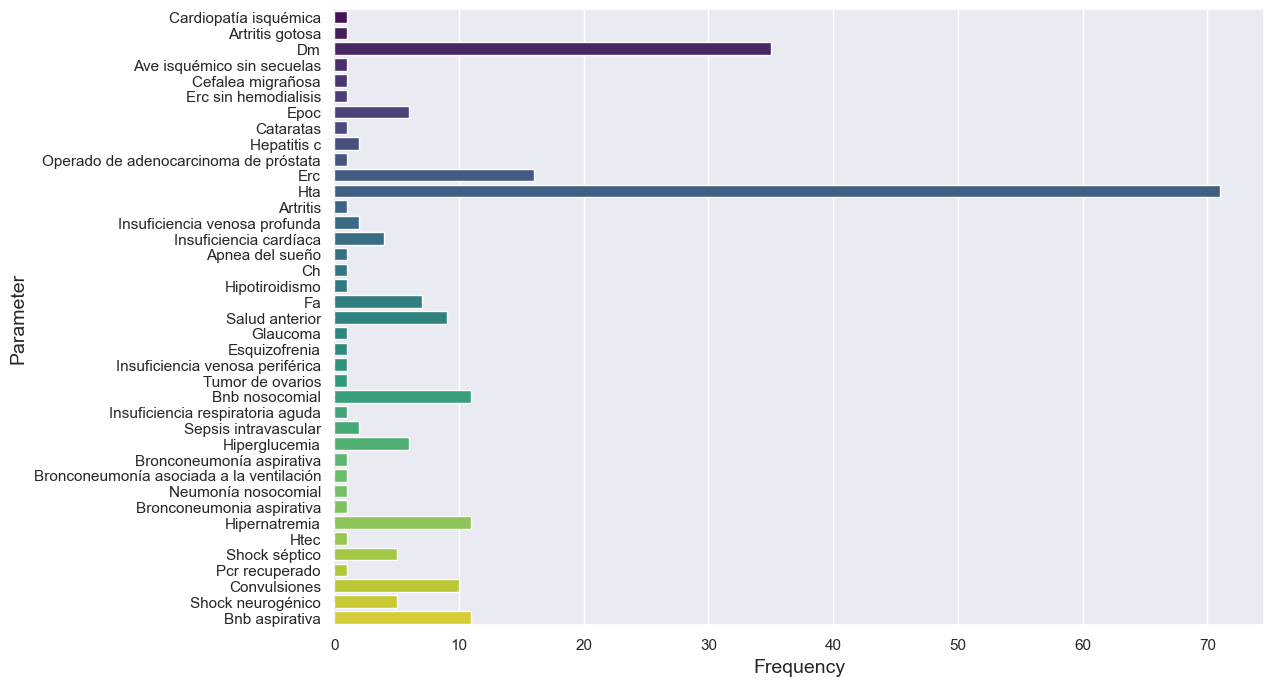

In [26]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Parameter', data=disease_df, palette='viridis')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Parameter', fontsize=14)
plt.axvline(0, color='grey', linestyle='--')
plt.show()

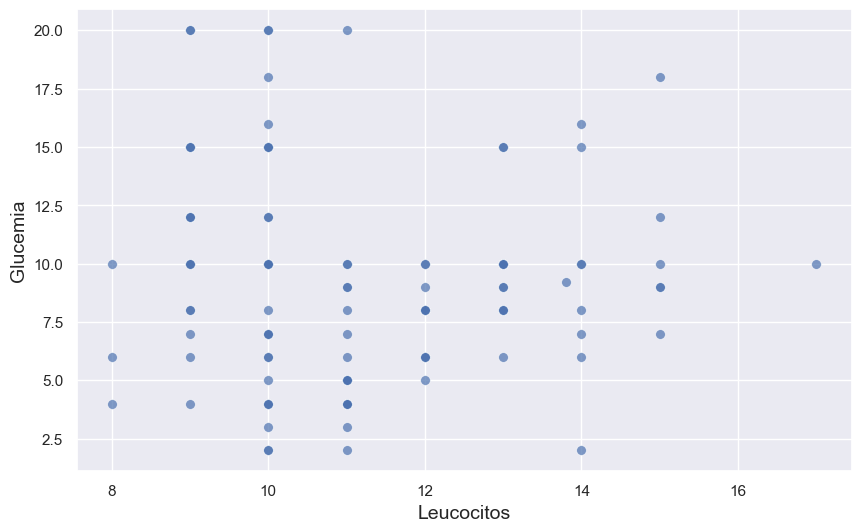

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Leucocitos', y='Glucemia', data=data, alpha=0.7, s=50)
plt.xlabel('Leucocitos', fontsize=14)
plt.ylabel('Glucemia', fontsize=14)
plt.show()

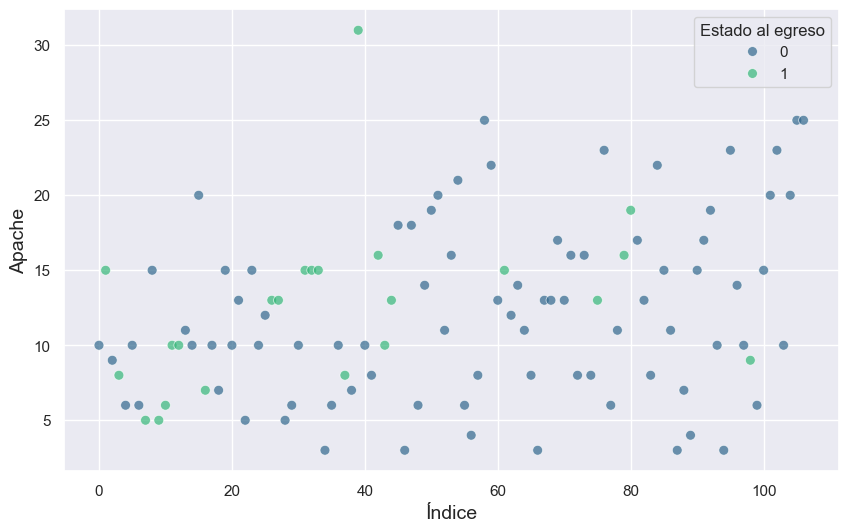

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y='Apache', data=data, hue='Estado al egreso', alpha=0.7, palette='viridis', s=50)
plt.xlabel('Índice', fontsize=14)
plt.ylabel('Apache', fontsize=14)
plt.show()

In [9]:
data.drop(columns=['Leucocitos', 'Glucemia', 'Glucemia en  mg/dl', 'Estado al egreso'], axis=1, inplace=True)

In [10]:
X, y = data.drop('Ilg', axis=1), data['Ilg']

In [11]:
X.var(axis=0)

Edad                                        135.136484
Sexo                                          0.251278
Trastorno de consciencia                      8.524423
Apache                                       34.120966
Cardiopatía isquémica                         0.009346
Artritis gotosa                               0.009346
Dm                                            0.222183
Ave isquémico sin secuelas                    0.009346
Cefalea migrañosa                             0.009346
Erc sin hemodialisis                          0.009346
Epoc                                          0.053430
Cataratas                                     0.009346
Hepatitis c                                   0.018515
Operado de adenocarcinoma de próstata         0.009346
Erc                                           0.128372
Hta                                           0.225357
Artritis                                      0.009346
Insuficiencia venosa profunda                 0.018515
Insuficien

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=12)

selector.fit_transform(X, y)

features = X.columns[selector.get_support(indices=True)]
features

Index(['Cefalea migrañosa', 'Insuficiencia venosa profunda', 'Apnea del sueño',
       'Hipotiroidismo', 'Fa', 'Glaucoma', 'Esquizofrenia', 'Tumor de ovarios',
       'Bronconeumonía asociada a la ventilación', 'Hipernatremia',
       'Shock neurogénico', 'Bnb aspirativa'],
      dtype='object')

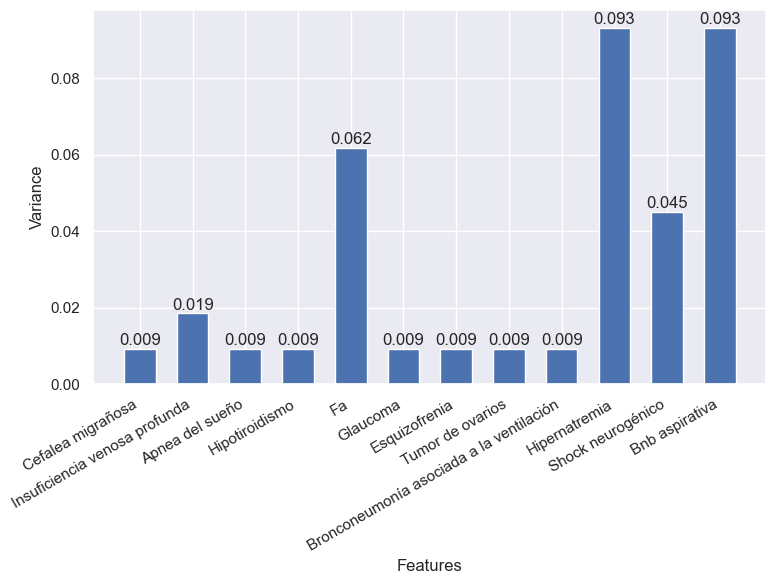

In [13]:
fig , ax = plt.subplots()

fig.set_size_inches(8,6)

x = features
y_ = X[features].var(axis=0)

ax.bar(x, y_ , width= 0.6)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')

for index, value in enumerate(y_):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()    

In [14]:
X = X[features]

In [15]:
matrix = X.join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

Text(0.5, 1.0, 'Correlation Matrix Between Selected Features')

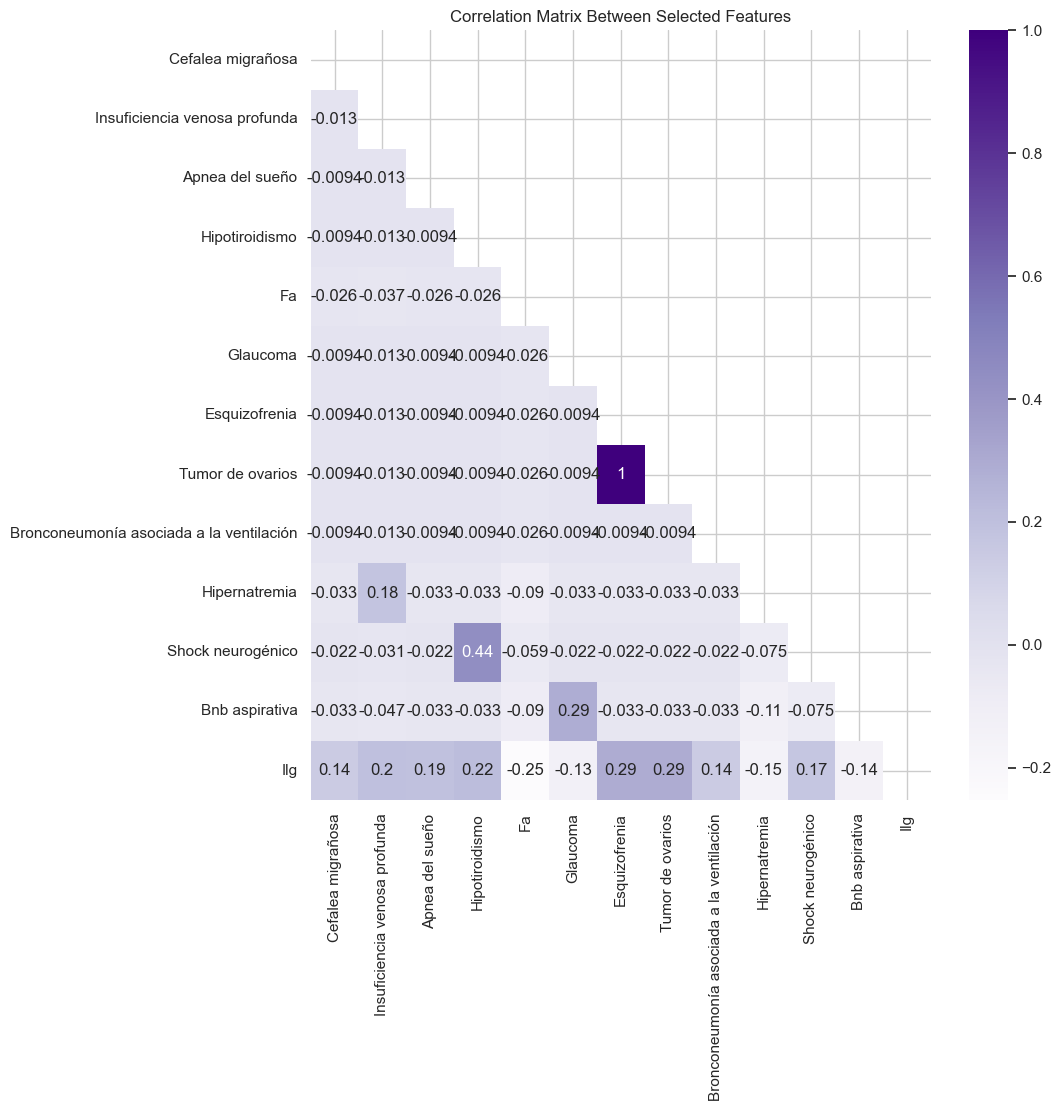

In [19]:
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
sns.heatmap(matrix, annot=True, cmap='Purples', mask=mask)
plt.title('Correlation Matrix Between Selected Features')

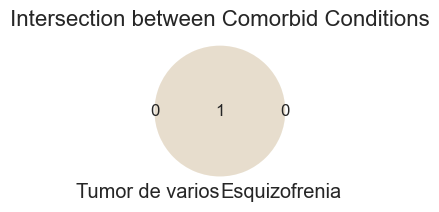

In [51]:
from matplotlib_venn import venn2

condition1 = data[data['Tumor de ovarios'] == 1]
condition2 = data[data['Esquizofrenia'] == 1]

set1 = set(condition1.index)
set2 = set(condition2.index)

plt.figure(figsize=(2, 2))
venn2([set1, set2], ('Tumor de varios', 'Esquizofrenia'))
plt.title('Intersection between Comorbid Conditions', fontsize=16)
plt.show()

In [17]:
X.drop(['Tumor de ovarios'], axis=1, inplace=True)

In [18]:
data = X.join(y)
data.to_csv('data/processed/data.csv', index=False)